 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [ ]:
class My_Video():
    def __init__(self, title, quality, duration, cast, genre, captioning):
        self.title = title
        self.quality = quality
        self.duration = duration
        self.cast = cast
        self.genre = genre
        self.captioning = captioning
     
    def change_video(self):
        new_show = input("What would you like to watch? ")
        self.title = new_show
        print(f"You are now watching {self.title}!")
        
    def __repr__(self):
        rep = f"{self.title}, {self.quality}, {self.duration}"
        return rep
        
    def control_captioning(self):
        if self.captioning == True:
            self.captioning = False
            print("Captions are now turned off")
        elif self.captioning == False:
            self.captioning = True
            print("Captions are now turned on")
        
    def limited_bandwidth(self):
        self.quality = '480p'
        print(f"Due to limited bandwidth, the max quality you can stream is {self.quality}")
        
    def add_cast(self):
        cast_switch = input("Which cast would you like add: ")
        self.cast.append(cast_switch)
        print(f"The {self.title} has now a new member {cast_switch}. Welcome {cast_switch}!")

    def change_quality(self):
        new_quality = input("What quality would you like? ")
        self.quality = new_quality
        print(f"Your video is now in {self.quality}p! Look at that picture!")

    def newDuration(self):
        dura = int(input("What is the duration of your video? (Cannot be over 10 minutes)"))
        if dura <= 10:
            duration = dura
            print(f"Your video is {dura} minutes long")
        else:
            print("Your video is too long!")

        
new_video = My_Video("Cool Video", "1080p", "90 min", ["Ryan", "Alex", "Nate", "Tenzin", "Kayla", "John"], "Spoopy", True)

print(new_video.title)

new_video.__repr__()
    

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [ ]:
# Attributes from instaces are unique to that instance
# Attributes are "protected" and only to be accessed by class methods

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "

    

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [ ]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [ ]:
class Series():
    def __init__(self):
        self.id= None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    
    def get_info(self, query = ''):
        data = None #<-- in case we can't find the show we're looking for.
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    #print(data)
                else:
                    print(f"Series Error: Status Code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: Status Code {r.status_code}")
                    
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
            
        # API call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.season = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes] #This is the "Mixin" part
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i >0 and i % 3 == 0:
                watching = input("Are you still watching? [y/n] ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
                
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
                            

In [ ]:
first_show = Series()
first_show.get_info()

for show in first_show.episodes:
    print(show)

In [ ]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [ ]:
class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    #add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    #choose user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")

    #add to watchlist
    def add_to_watch_list(self, query = ''):
        show = Series() #Mixin
        show.get_info(query)

        self.watch_list.append(show)

        print(f"{show.title} has been added to your watchlist!")

    #choose from watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))

        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
        else:
            response = input(f"{watch} is not in your watch list.... would you like to add it? [y/n] ")
            if response in ('yes','y'):
                self.add_to_watch_list(watch)

                print("............")
                sleep(2)
                print("............")
                self.watch_list[-1].watch()

    #run function to drive the program
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            What would you like to do?
            Add Shows
            Watch
            Add User
            Quit
            
            """)
                        
        while True:
            response = input("What would you like to do?: ")
            
            if response.lower() == "add shows":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add user":
                self.add_user()
            elif response.lower() == "quit":
                print(f"What? Like you're gonna go outside...?")
                break
            else:
                print("Please choose a valid input. ")
            
            
            

In [ ]:
codeflix = Theater()
codeflix.run()


In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        

    def get_info(self, query=''):
        data = None #<-- in case we cant find the show we're looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else: 
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
                
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
                
                
        # Api call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
     

class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    #add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    #choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")
    
    #add to watchlist
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist!")
        
    #choose from watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:            
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
        
        watch = input("What would you like to watch? ")
        
#         if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
        for series in self.watch_list:
            if series.title.lower() == watch.lower().strip():
                series.watch()
                break
            
                           
        else:
      
            response = input(f"{watch} is not in your watch list....would you like to add it... y/n?")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)

                print("............")
                sleep(2)
                print("............")
                self.watch_list[-1].watch()
                
    # run function to drive the program
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            What would you like to do?
            Search - Search for shows
            Watch - Pick something from your watchlist
            Add - add a new user
            Quit - close the application
            
            """)
            
        while True:
            response = input("What would you like to do? (search, watch, add, quit) ")
            
            if response.lower() == "search":
                self.add_to_watchlist()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside!")
                break
            else:
                print("Invalid Inpu: please choose from the list!")
        
        

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [61]:
#Added an attribute to save what ou've watched and resume at current episode, as well as list the episode numbers.
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

# Attributes from instaces are unique to that instance
# Attributes are "protected" and only to be accessed by class methods

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing Ep {self.number} - {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "

class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
    
class Series():
    def __init__(self):
        self.id= None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.current_ep = 0
        
    
    def get_info(self, query = ''):
        data = None #<-- in case we can't find the show we're looking for.
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    #print(data)
                else:
                    print(f"Series Error: Status Code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: Status Code {r.status_code}")
                    
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
            
        # API call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.season = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes] #This is the "Mixin" part
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i >0 and i % 3 == 0:
                watching = input("Are you still watching? [y/n] ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[self.current_ep].play()
            sleep(self.episodes[self.current_ep].length.seconds/1000)
            self.current_ep += 1
            
                
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
                            
class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    #add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    #choose user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")

    #add to watchlist
    def add_to_watch_list(self, query = ''):
        show = Series() #Mixin
        show.get_info(query)

        self.watch_list.append(show)

        print(f"{show.title} has been added to your watchlist!")

    #choose from watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            print(f"\nCurrent Ep: {series.current_ep + 1}")
            display(Image(series.episodes[series.current_ep].link))

        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
        else:
            response = input(f"{watch} is not in your watch list.... would you like to add it? [y/n] ")
            if response in ('yes','y'):
                self.add_to_watch_list(watch)

                print("............")
                sleep(2)
                print("............")
                self.watch_list[-1].watch()

    #run function to drive the program
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            What would you like to do?:
                [Add Shows] - Add shows to your watchlist
                [Watch] - Watch a show from your watchlist
                [Add User] - Add a new user to your account
                [Quit] - Exit the application
            
            """)
                        
        while True:
            response = input("What would you like to do?: ")
            
            if response.lower() == "add shows":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add user":
                self.add_user()
            elif response.lower() == "quit":
                print(f"What? Like you're gonna go outside...?")
                break
            else:
                print("Please choose a valid input. ")
            
            
            

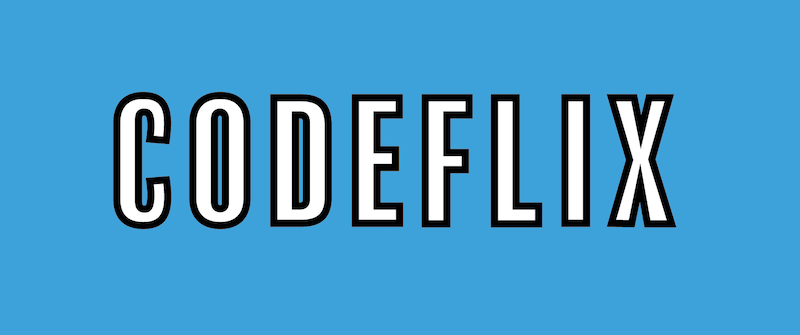

Create a profile: nil
Users: 
Nil
Choose a user: nil

            What would you like to do?:
                [Add Shows] - Add shows to your watchlist
                [Watch] - Watch a show from your watchlist
                [Add User] - Add a new user to your account
                [Quit] - Exit the application
            
            
What would you like to do?: watch
What would you like to watch? simpsons
simpsons is not in your watch list.... would you like to add it? [y/n] y
The Simpsons has 741 episodes
The Simpsons has been added to your watchlist!
............
............
Now playing Ep 1 - Simpsons Roasting on an Open Fire


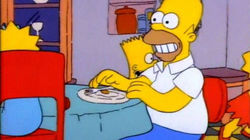

Now playing Ep 2 - Bart the Genius


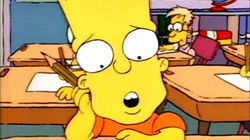

Now playing Ep 3 - Homer's Odyssey


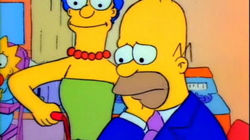

Are you still watching? [y/n] n
What would you like to do?: watch


Title: The Simpsons | Episodes: 741

Summary: 
 <p><b>The Simpsons</b> is the longest running scripted show in US television history. It captures the adventures of Homer, Marge, Maggie, Bart and Lisa who are living in a fictional town called Springfield.</p>

Current Ep: 4


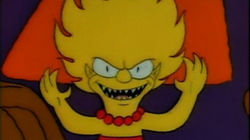

What would you like to watch? The Simpsons
Now playing Ep 4 - There's No Disgrace Like Home


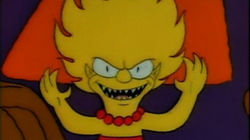

Now playing Ep 5 - Bart the General


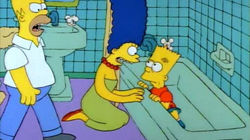

Now playing Ep 6 - Moaning Lisa


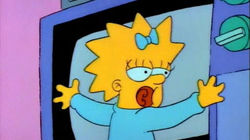

Are you still watching? [y/n] n
What would you like to do?: quit
What? Like you're gonna go outside...?


In [62]:
codeflix = Theater()
codeflix.run()
